In [1]:
import pystan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#We begin with creating stan model.

In [4]:
twoDNormal = """
data {
    vector[2] Mu;
    matrix[2, 2] Sigma;
}
generated quantities {
    vector[2] y = multi_normal_rng(Mu, Sigma);
}
"""
modelTwoDNormal = pystan.StanModel(model_code = twoDNormal)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_221007fbcb81a16781cc40c231c7c7a8 NOW.


In [9]:
#We do the sampling and plot the histogram. Covariance matrix = [1, 0.5; 0.5, 1]
import numpy as np
data2DNormal = {'Mu': np.array([0, 0]), 'Sigma': np.array([[1, 0.5], [0.5, 1]])}
sim_pcc_2d_normal = modelTwoDNormal.sampling(data = data2DNormal, algorithm = 'Fixed_param', iter = 1000)

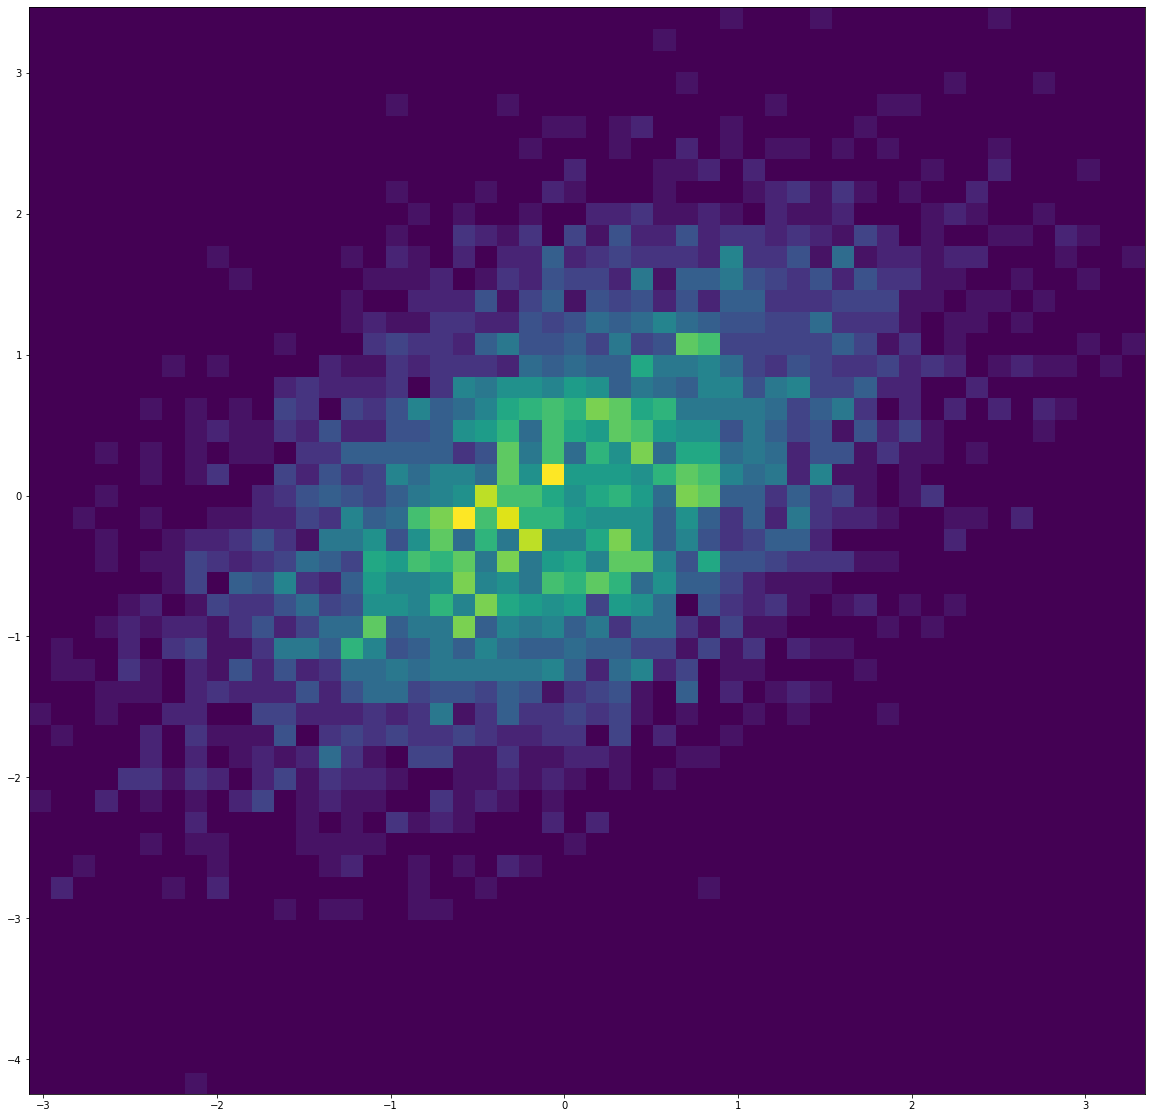

In [89]:
import pandas as pd
params = pd.DataFrame(sim_pcc_2d_normal.extract()['y'])
params.columns = ['y1', 'y2']
plt.figure(figsize = [20, 20])
plt.hist2d(params['y1'], params['y2'], bins = 50)
plt.show()

In [36]:
#Now we check five other covariance matrices and compare their results with the previous one.
matr = [[[1, 0.1], [0.1, 1]],
        [[1, 0.5], [0.5, 1]],
        [[1, 0.9], [0.9, 1]],
        [[2, 0.2], [0.2, 2]],
        [[2, 1], [1, 2]],
        [[2, 1.8], [1.8, 2]]]
dicts = []
sim_pcc_2d_normal_list = []
params = []
for matrix in matr:
    dicts.append({'Mu': np.array([0, 0]), 'Sigma': np.array(matrix)})
for dic in dicts:
    sim_pcc_2d_normal_list.append(modelTwoDNormal.sampling(data = dic, algorithm = 'Fixed_param', iter = 1000))
for sim in sim_pcc_2d_normal_list:
    param = pd.DataFrame(sim.extract()['y'])
    param.columns = ['y1', 'y2']
    params.append(param)


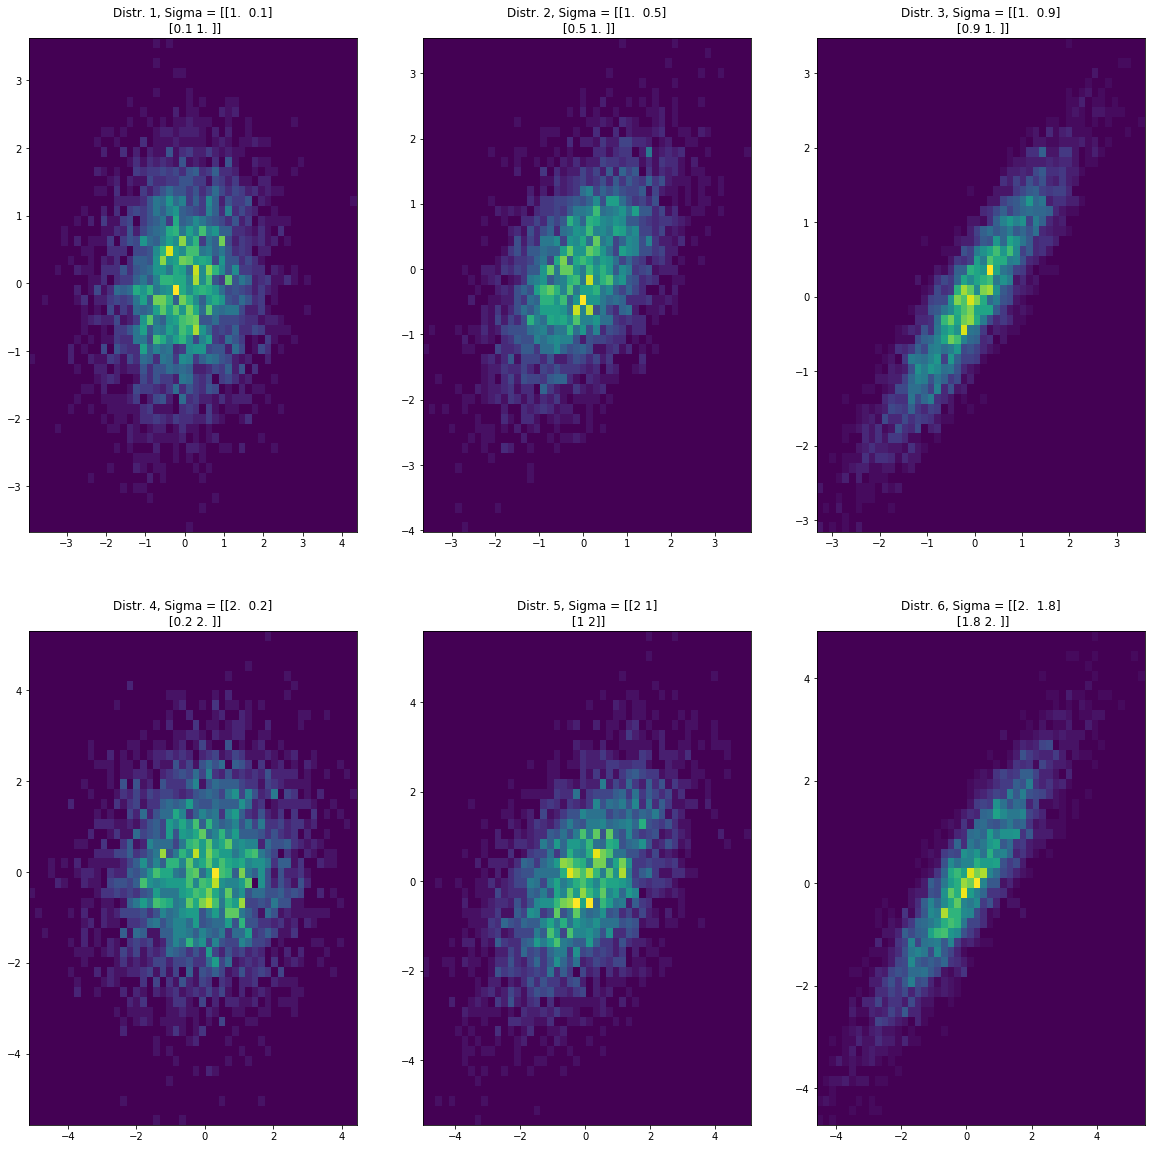

In [46]:
fig = plt.figure(figsize = [20, 20])
for i in range(6):
    plt.subplot(2, 3, i + 1).set_title("Distr. {}, Sigma = {}".format(i + 1, dicts[i]['Sigma']))
    plt.hist2d(params[i]['y1'], params[i]['y2'], bins = 50)

In [45]:
#Now we get the correlation matrices for each of the above distributions.
corrs = []
for param in params:
    corrs.append(np.corrcoef(param['y1'], param['y2']))
print("Distr. 1:\n{}\n\nDistr. 2:\n{}\n\nDistr. 3:\n{}\n\nDistr. 4:\n{}\n\nDistr. 5:\n{}\n\nDistr. 6:\n{}".
      format(corrs[0], corrs[1], corrs[2], corrs[3], corrs[4], corrs[5]))

Distr. 1:
[[1.         0.08875898]
 [0.08875898 1.        ]]

Distr. 2:
[[1.         0.50957122]
 [0.50957122 1.        ]]

Distr. 3:
[[1.       0.900795]
 [0.900795 1.      ]]

Distr. 4:
[[1.         0.08788427]
 [0.08788427 1.        ]]

Distr. 5:
[[1.         0.50550004]
 [0.50550004 1.        ]]

Distr. 6:
[[1.         0.89667845]
 [0.89667845 1.        ]]


In [48]:
#It can be easily seen that larger correlation coeficients make random variables more linearly-dependent.
#We create 3-d normal distribution.
threeDNormal = """
data {
    vector[3] Mu;
    matrix[3 ,3] Sigma;
}
generated quantities {
    vector[3] y = multi_normal_rng(Mu, Sigma);
}
"""
model3DNormal = pystan.StanModel(model_code = threeDNormal)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_097090049f8eef993a2db9615c235d19 NOW.


In [50]:
#We do the sampling and plot the histograms. Covariance matrix = [1, 0.25, 0.75; 0.25, 1, 0.5; 0.75, 0.5, 1]
data3DNormal = {'Mu': np.array([0, 0, 0]), 'Sigma': np.array([[1, 0.25, 0.75], [0.25, 1, 0.5], [0.75, 0.5, 1]])}
sim_pcc_3d_normal = model3DNormal.sampling(data = data3DNormal, algorithm = 'Fixed_param', iter = 1000)
param = pd.DataFrame(sim_pcc_3d_normal.extract()['y'])
param.columns = ['y1', 'y2', 'y3']

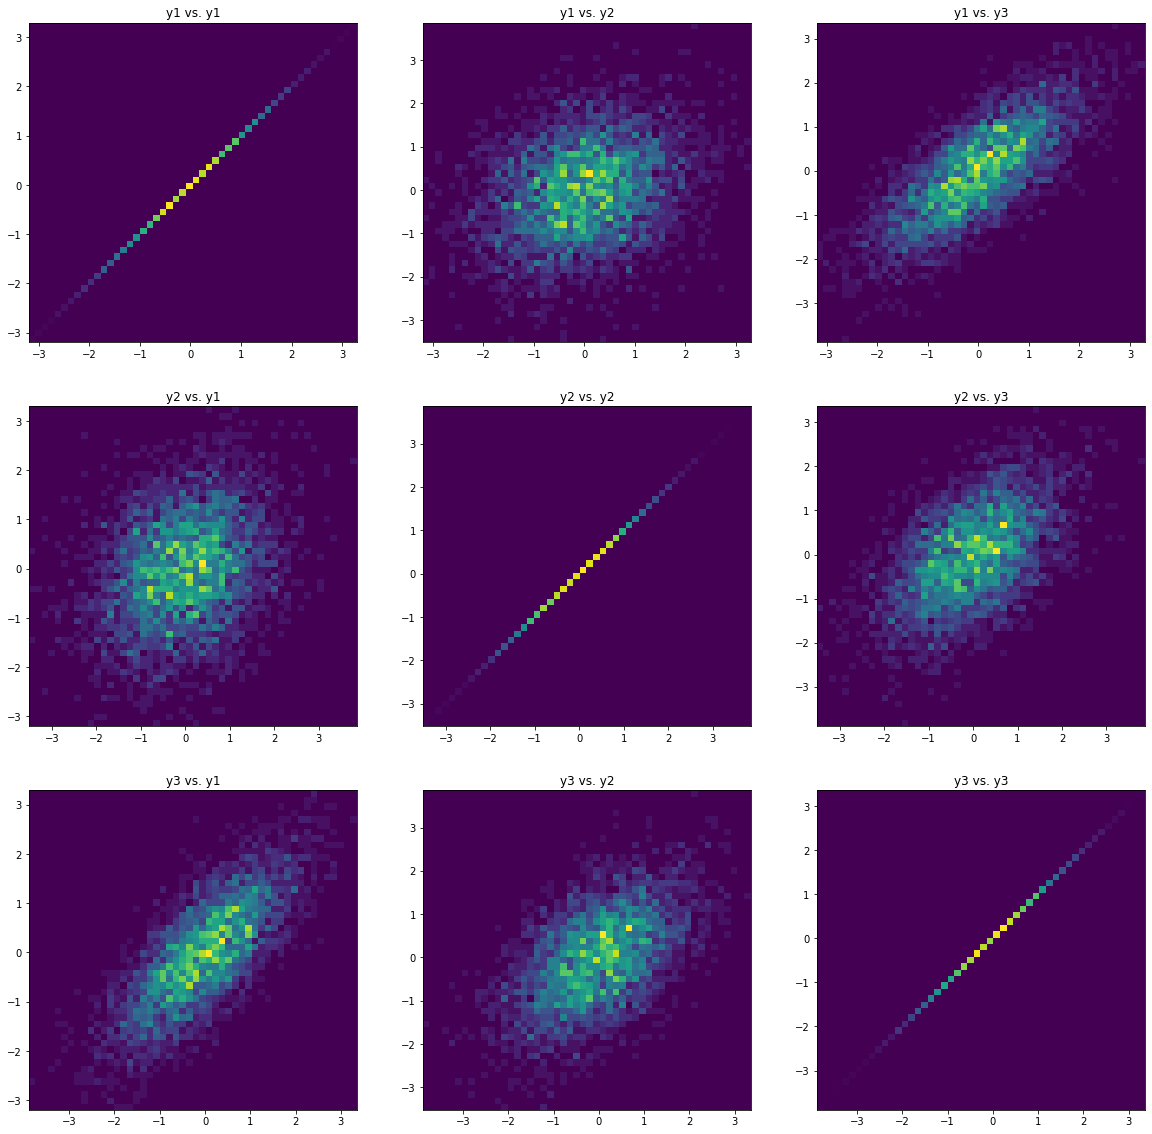

In [81]:
fig = plt.figure(figsize = [20, 20])
for i in range(3):
    plt.subplot(3, 3, i + 1).set_title("y1 vs. y{}".format(i + 1))
    plt.hist2d(param.iloc[:, 0], param.iloc[:, i], bins = 50)
for i in range(3):
    plt.subplot(3, 3, i + 4).set_title("y2 vs. y{}".format(i + 1))
    plt.hist2d(param.iloc[:, 1], param.iloc[:, i], bins = 50)
for i in range(3):
    plt.subplot(3, 3, i + 7).set_title("y3 vs. y{}".format(i + 1))
    plt.hist2d(param.iloc[:, 2], param.iloc[:, i], bins = 50)

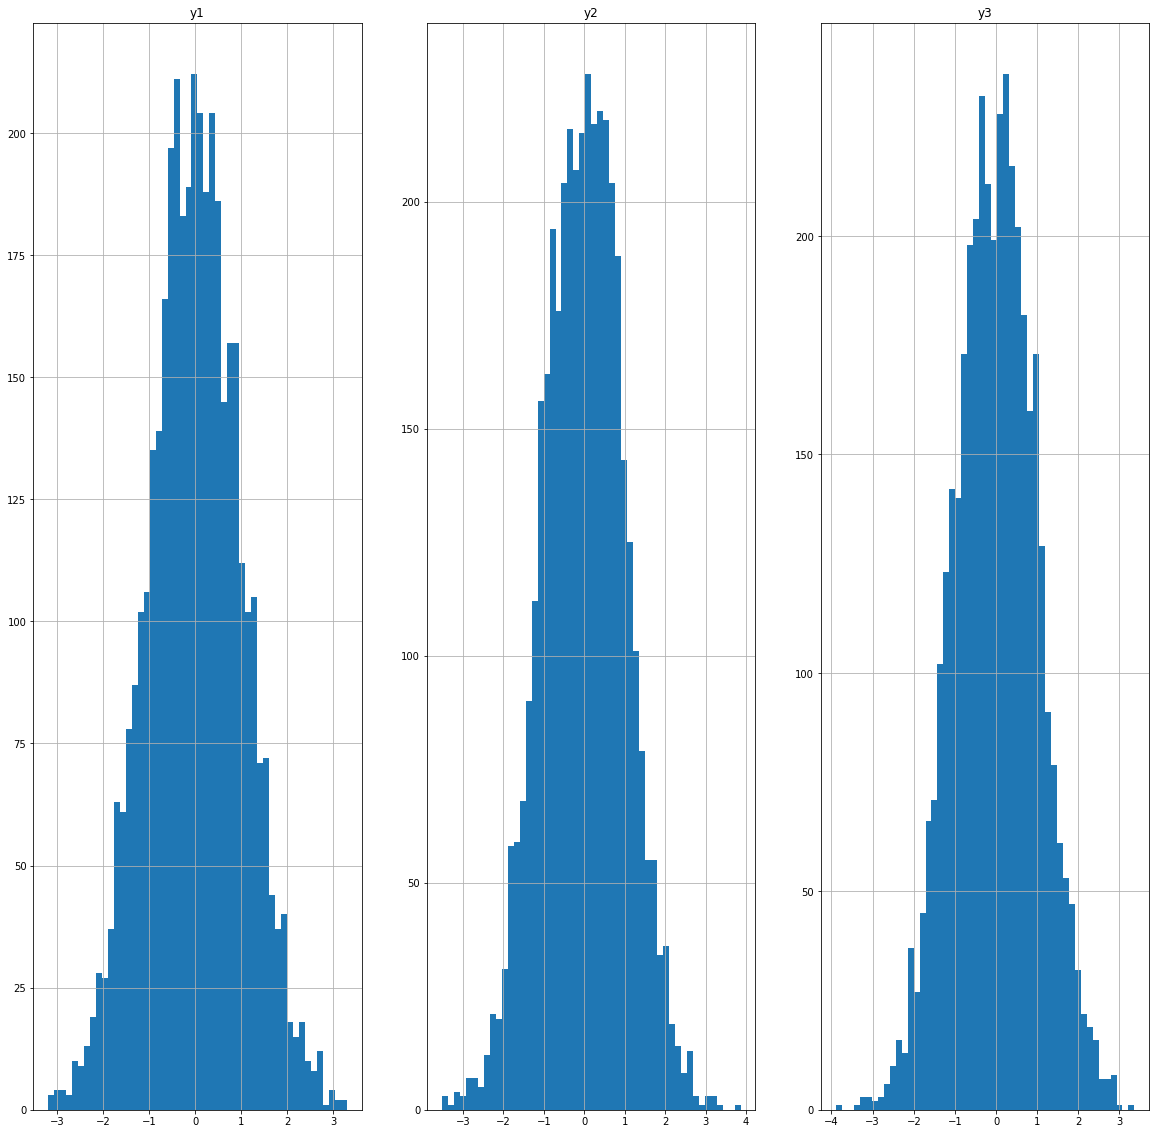

In [83]:
#We can also plot histograms for each variable.
plt.figure(figsize = [20, 20])
for i in range(3):
    plt.subplot(1, 3, i + 1).set_title('y{}'.format(i + 1))
    plt.hist(param.iloc[:, i], bins = 50)
    plt.grid()
plt.show()

In [84]:
#We do the same for 4-D normal distribution.
fourDNormal = """
data {
    vector[4] Mu;
    matrix[4 ,4] Sigma;
}
generated quantities {
    vector[4] y = multi_normal_rng(Mu, Sigma);
}
"""
model4DNormal = pystan.StanModel(model_code = fourDNormal)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_30383809b4ff8c902a9ffd4d515b2fb2 NOW.


In [86]:
#Covariance matrix = [1, 0.5, 0.75, 0.1; 0.5, 2, 1.25, 1.75; 0.75, 1.25, 3, 2.5; 0.1, 1.75, 2.5, 4]
data4DNormal = {'Mu': np.array([0, 0, 0, 0]), 'Sigma': np.array([[1, 0.5, 0.75, 0.1], [0.5, 2, 1.25, 1.75],
                                                             [0.75, 1.25, 3, 2.5], [0.1, 1.75, 2.5, 4]])}
sim_pcc_4d_normal = model4DNormal.sampling(data = data4DNormal, algorithm = 'Fixed_param', iter = 1000)
param = pd.DataFrame(sim_pcc_4d_normal.extract()['y'])
param.columns = ['y1', 'y2', 'y3', 'y4']

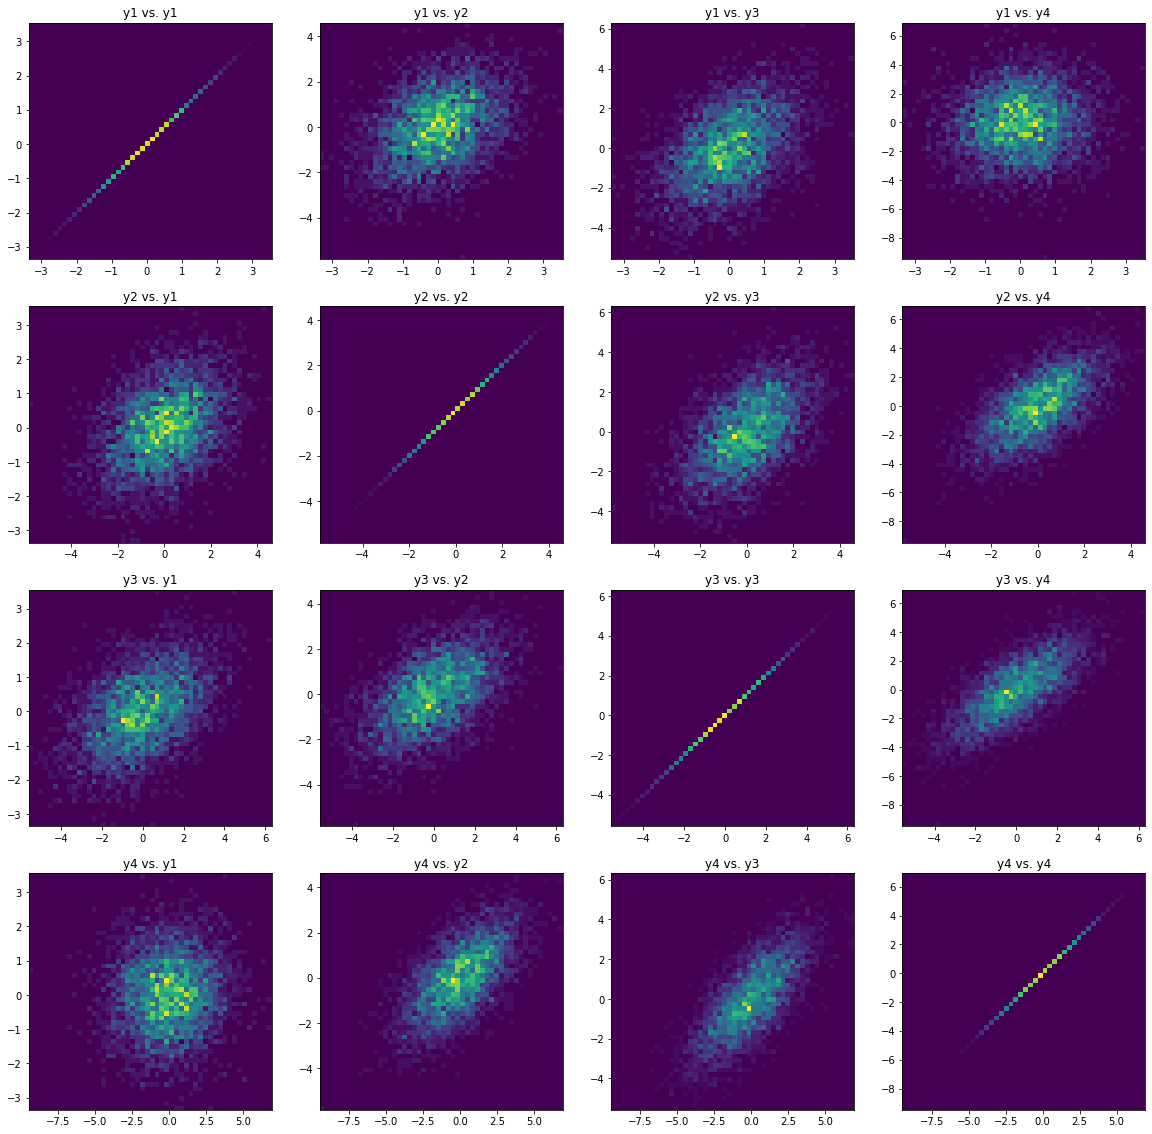

In [87]:
fig = plt.figure(figsize = [20, 20])
for i in range(4):
    plt.subplot(4, 4, i + 1).set_title("y1 vs. y{}".format(i + 1))
    plt.hist2d(param.iloc[:, 0], param.iloc[:, i], bins = 50)
for i in range(4):
    plt.subplot(4, 4, i + 5).set_title("y2 vs. y{}".format(i + 1))
    plt.hist2d(param.iloc[:, 1], param.iloc[:, i], bins = 50)
for i in range(4):
    plt.subplot(4, 4, i + 9).set_title("y3 vs. y{}".format(i + 1))
    plt.hist2d(param.iloc[:, 2], param.iloc[:, i], bins = 50)
for i in range(4):
    plt.subplot(4, 4, i + 13).set_title("y4 vs. y{}".format(i + 1))
    plt.hist2d(param.iloc[:, 3], param.iloc[:, i], bins = 50)

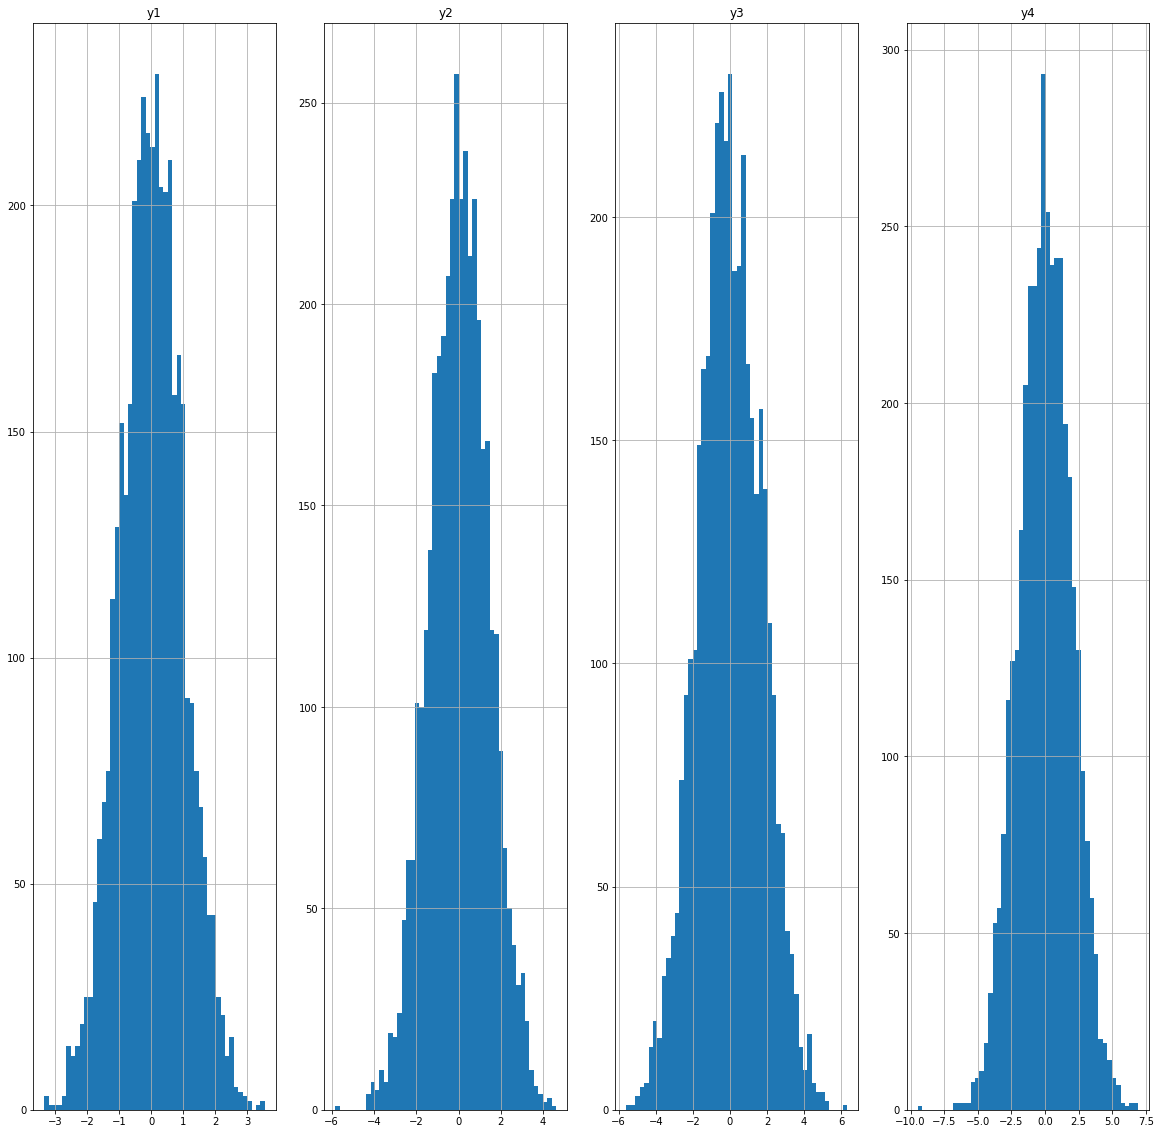

In [88]:
plt.figure(figsize = [20, 20])
for i in range(4):
    plt.subplot(1, 4, i + 1).set_title('y{}'.format(i + 1))
    plt.hist(param.iloc[:, i], bins = 50)
    plt.grid()
plt.show()